## Bigmartsales data set
0. import libraries
1. read the dataset
2. check the no of rows and column
3. check for no of missing values


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
print('library imported')

library imported


In [3]:
path = 'C:/Users/Huligesh/Desktop/Abeyaantrix Internship/Dataset/'
file_name = 'bigmartsales.csv'
df = pd.read_csv(path + file_name)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [10]:
df.shape

(8523, 13)

In [47]:
# check for missing values, check for std missing data 

df.isnull().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [48]:
# check for the unique value present in each column

print(df.columns)
for col in df.columns:
    print(col, df[col].unique())
    print()
    
# item fat content has types, which needs to be corrected
# outlet size has non std missing value
# outlet location type has non std missing value


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')
Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Item_Weight [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     0.     8.85
  9.8   13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895
 10.895  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25
  7.855  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055
  6.305 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1
 10.5    6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65
 20.25   8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8
 16.6 

In [49]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [50]:
# preprocesssing on the item fat column

df1 = df.copy()
df1.Item_Fat_Content.replace('low fat', 'Low fat', inplace = True )
df1.Item_Fat_Content.replace('LF', 'Low fat', inplace = True )
df1.Item_Fat_Content.replace('reg', 'Regular', inplace = True )
df1.Item_Fat_Content.unique() 

array(['Low Fat', 'Regular', 'Low fat'], dtype=object)

In [51]:
# convert non std missing valuess to std missing values

df1.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [52]:
df1.Outlet_Size.replace(np.nan, 'Medium', inplace = True)

In [53]:
df1.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [54]:
# SI = SimpleImputer(misssing_values = np.NaN, strategy = 'mode') using sklearn
# df1['Outlet_Size'] = SI.fit_transform(df1['Outlet_Type']) using pandas

In [55]:
df1.Outlet_Location_Type.unique()

array(['Tier 2', nan, 'Tier 3', '  --', 'Tier1', 'na', '  -', '?', 'NAN'],
      dtype=object)

In [56]:
# converting non std missing values to std missing values

nsm = [ '  --', 'na', '  -', '?', 'NAN']
for mv in nsm:
    df1.Outlet_Location_Type.replace(mv, np.nan, inplace = True)
df1.Outlet_Location_Type.unique()

array(['Tier 2', nan, 'Tier 3', 'Tier1'], dtype=object)

In [57]:
SI = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df1.iloc[:,-4:-3] = SI.fit_transform(df1.iloc[:,-4:-3])
df1.Outlet_Location_Type.unique()

array(['Tier 2', 'Tier 3', 'Tier1'], dtype=object)

In [58]:
df1.isnull().sum()

Item_Identifier                0
Item_Weight                  749
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
Profit                         0
dtype: int64

In [59]:
SI = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df1.iloc[:,1:2] = SI.fit_transform(df1.iloc[:,1:2])

In [60]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

In [61]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


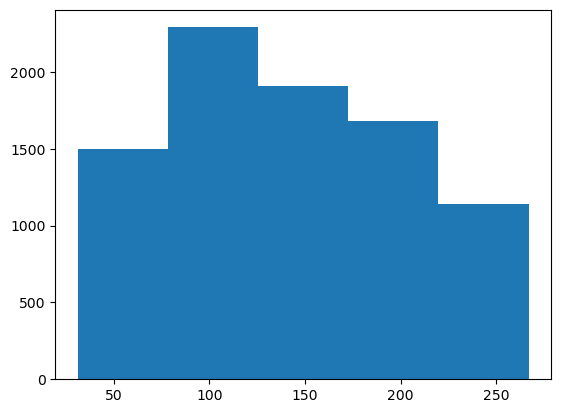

more than 60% of product are priced less than 15 dollars 
        and price tag between 50 to 100  dollars has th highest no. of product listed


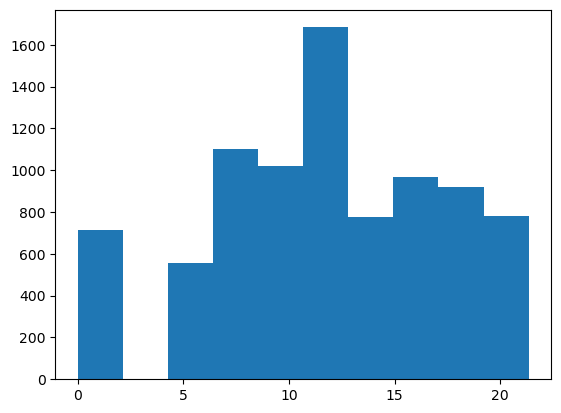

 Item weight is distrubuted mostly normal in all item weight category except almost 50% 
            products weight less than 11 kg (which is average )


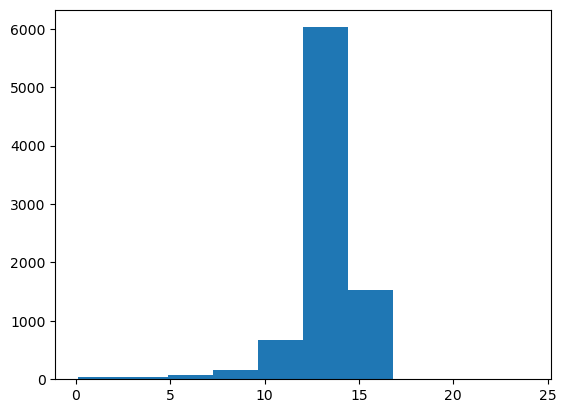

In [66]:
# few visualization like histogram of mrp, item weight, profit
# bar chart of year of establishment vs no shop in that particular year

plt.hist(df1.Item_MRP, bins = 5)
plt.show()
print("""more than 60% of product are priced less than 15 dollars 
        and price tag between 50 to 100  dollars has th highest no. of product listed""")

plt.hist(df1.Item_Weight, bins = 10)
plt.show()
print(""" Item weight is distrubuted mostly normal in all item weight category except almost 50% 
            products weight less than 11 kg (which is average )""")


plt.hist(df.Profit)
plt.show()



In [84]:
df.Outlet_Establishment_Year.value_counts().keys().astype('str')

Index(['1985', '1987', '1999', '1997', '2004', '2002', '2009', '2007', '1998'], dtype='object')

In [80]:
df1.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

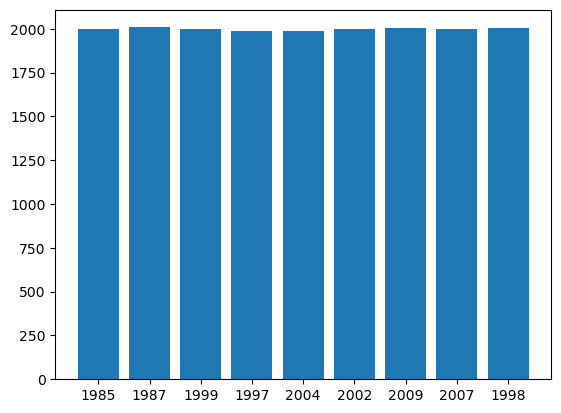

In [82]:
plt.bar(df1.Outlet_Establishment_Year.value_counts().keys().astype('str'), df1.Outlet_Establishment_Year.unique())
plt.show()

In [ ]:
# item label encoding
# item type: one hot encoding
# outlet identifier: discard
# outlet size: label or ordinal encoding
# outlet type:
# scalling numeric value


In [87]:
df_num = df.select_dtypes(include = np.number)
df_cat = df.select_dtypes(exclude = np.number)

In [88]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df_num.iloc[:,:] = Imputer.fit_transform(df_num.iloc[:,:])
df_num

C:\Users\Huligesh\AppData\Local\Temp\ipykernel_14072\9141533.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_num.iloc[:,:] = Imputer.fit_transform(df_num.iloc[:,:])


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,9.300,0.016047,249.8,1999.0,3735.1380,11.5
1,5.920,0.019278,48.3,2009.0,443.4228,14.3
2,17.500,0.016760,141.6,1999.0,2097.2700,14.5
3,19.200,0.000000,182.1,1998.0,732.3800,13.6
4,8.930,0.000000,53.9,1987.0,994.7052,14.1
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5,1987.0,2778.3834,14.1
8519,8.380,0.046982,108.2,2002.0,549.2850,14.2
8520,10.600,0.035186,85.1,2004.0,1193.1136,9.5
8521,7.210,0.145221,103.1,2009.0,1845.5976,14.2
